# Quantify the reference search pipeline 

In [1]:
## calculate the total number of paragraphs GPT-4 generated and the number of paragraphs that contain citations

import pandas as pd
import json
import re
FilePath = 'data/merged_new_LLM_GSEA_simVals_refs.txt'

df = pd.read_csv(FilePath, sep='\t')

with open ('paragraph_ref_data.json') as json_file:
    para_ref_dict = json.load(json_file)


total_paragraphs = 0
cited_paragraphs = 0
paragraphs_no_keywords = 0
num_citations_per_paragraph = []
for i, row in df.iterrows():
    
    set_name = row['DataSet'] + '_' + row['Human Name']

    ref_text = row['References']
    if not pd.isna(ref_text):
        # split the input text into paragraphs
        paragraphs, references = ref_text.split('='*200)
        paragraphs =  list(filter(lambda p: len(p.split()) > 5, paragraphs.split("\n\n")))
        
        citation_indices = [re.findall(r'\[(\d+)\]', paragraph) for paragraph in paragraphs]
        num_citations = [len(citations) for citations in citation_indices]
        num_citations_per_paragraph.extend(num_citations)
        num_paragraphs = len(paragraphs)
        # total number of paragraphs from gpt responses
        total_paragraphs += num_paragraphs
        # count the number of paragraphs that contain citations
        num_cited_paragraphs = sum([1 for num_citation in num_citations if num_citation > 0])
        cited_paragraphs += num_cited_paragraphs
        print(f'{set_name}: {num_cited_paragraphs} out of {num_paragraphs} paragraphs contain citations')

        # remove the citation indices from the paragraphs
        clean_paragraphs = [re.sub(r'\[\d+\]', '', paragraph) for paragraph in paragraphs]
        for p in clean_paragraphs:
            if para_ref_dict[p]['keywords']== []:
                paragraphs_no_keywords += 1
            # print(p)
            # print(para_ref_dict[p])
            # print('-'*100) 
        print(paragraphs_no_keywords)
        
with open ('data/num_citations_per_paragraph.json', 'w') as f:
    json.dump(num_citations_per_paragraph, f)

NeST_Transcription regulation: 7 out of 9 paragraphs contain citations
2
NeST_Ubiquitin regulation of p53 activity: 7 out of 8 paragraphs contain citations
3
NeST_Homologous recombination: 15 out of 18 paragraphs contain citations
6
NeST_Foxo signaling: 10 out of 11 paragraphs contain citations
7
NeST_Neg Regulation EGFR: 8 out of 8 paragraphs contain citations
7
NeST_p53 regulation of cell cycle: 8 out of 13 paragraphs contain citations
12
NeST_Endoplasmic Reticulum protein processing: 7 out of 8 paragraphs contain citations
13
NeST_RAS-RAF-MAPK: 5 out of 6 paragraphs contain citations
14
NeST_Regulation of cellular homeostasis: 8 out of 10 paragraphs contain citations
16
NeST_ATM-independent DNA repair: 10 out of 11 paragraphs contain citations
17
NeST_Ubiquitin/Proteosome System: 6 out of 7 paragraphs contain citations
18
NeST_Histone modification: 6 out of 8 paragraphs contain citations
20
NeST_Nucleus: 3 out of 4 paragraphs contain citations
21
NeST_Apoptosis Regulation: 6 out of 

In [2]:
print(f'Total number of paragraphs: {total_paragraphs}')
print(f'Number of paragraphs that does not have keywords combination: {paragraphs_no_keywords}')
print(f'Total number of searched paragraphs: {total_paragraphs - paragraphs_no_keywords}')
print(f'Percentage of non searched paragraphs: {paragraphs_no_keywords/total_paragraphs*100: .2f}%')
print(f'Number of paragraphs that contain references: {cited_paragraphs}')
print(f'Percentage of paragraphs that contain references: {(cited_paragraphs/total_paragraphs)*100: .2f}%')
print(f'Percentage of searched paragraphs that contain references: {(cited_paragraphs/(total_paragraphs - paragraphs_no_keywords))*100: .2f}%')

Total number of paragraphs: 908
Number of paragraphs that does not have keywords combination: 187
Total number of searched paragraphs: 721
Percentage of non searched paragraphs:  20.59%
Number of paragraphs that contain references: 720
Percentage of paragraphs that contain references:  79.30%
Percentage of searched paragraphs that contain references:  99.86%


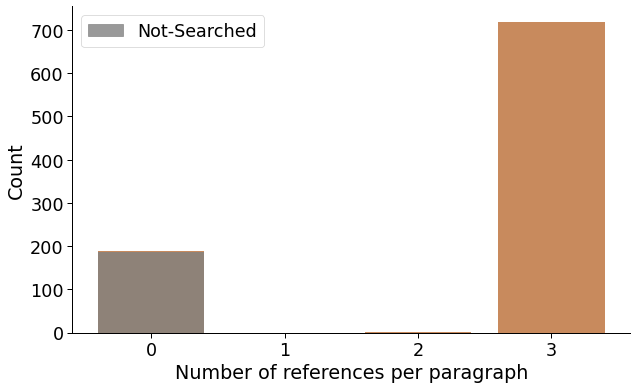

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd
import json 

with open ('data/num_citations_per_paragraph.json') as json_file:
    num_citations_per_paragraph = json.load(json_file)
num_citations_per_paragraph_df = pd.DataFrame(num_citations_per_paragraph, columns=['Citations'])
# Convert 'Citations' column to categorical type and define all possible categories
num_citations_per_paragraph_df['Citations'] = pd.Categorical(num_citations_per_paragraph_df['Citations'], categories=[0, 1, 2, 3])

# create the plot
sns.set_context("paper", font_scale=2)
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(data=num_citations_per_paragraph_df, x='Citations', ax=ax, color='chocolate', alpha=0.8)

ax.bar(x=0, height=paragraphs_no_keywords, color='grey', alpha=0.8)
sns.despine()
# Create a custom legend for the non-searched bar
legend_patch = mpatches.Patch(color='grey', alpha=0.8, label='Not-Searched')

# Add the legend to the plot
ax.legend(handles=[legend_patch], loc='upper left')

ax.set_xlabel('Number of references per paragraph')
ax.set_ylabel('Count')
plt.savefig('figures/num_citations_per_paragraph.pdf', dpi = 300, bbox_inches='tight')
plt.show()



In [4]:
num_citations_per_paragraph_df['Citations'].value_counts()

3    719
0    188
2      1
1      0
Name: Citations, dtype: int64